<a href="https://colab.research.google.com/github/Dmolight01/ProyectoModelosII/blob/main/EDA_y_preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Análisis Exploratorio de los datos

Cargamos las librerias necesarias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

## 1) Importando los datos

Comenzamos instalando desde kaggle los datos de test.csv

In [ ]:
# Instala la biblioteca de Kaggle
!pip install kaggle

# Importa las bibliotecas necesarias
import os
import json

# Define las credenciales de Kaggle
kaggle_credentials = {
    "username": "ricardoosorioc",
    "key": "1f1a995f7c48191dc94721671d272f0c"
}

# Crea la carpeta .kaggle si no existe
kaggle_folder = '/content/.kaggle'
if not os.path.exists(kaggle_folder):
    os.makedirs(kaggle_folder)

# Guarda las credenciales en un archivo JSON
with open('/content/.kaggle/kaggle.json', 'w') as json_file:
    json.dump(kaggle_credentials, json_file)

# Configura las variables de entorno para usar Kaggle
os.environ['KAGGLE_CONFIG_DIR'] = '/content/.kaggle'

In [ ]:
!kaggle competitions download icr-identify-age-related-conditions -f train.csv

  0% 0.00/329k [00:00<?, ?B/s]
100% 329k/329k [00:00<00:00, 67.9MB/s]


In [ ]:
df=pd.read_csv("train.csv")

In [ ]:
df.head()

Id        AB          AF          AH         AM        AR  \
0  000ff2bfdfe9  0.209377  3109.03329   85.200147  22.394407  8.138688   
1  007255e47698  0.145282   978.76416   85.200147  36.968889  8.138688   
2  013f2bd269f5  0.470030  2635.10654   85.200147  32.360553  8.138688   
3  043ac50845d5  0.252107  3819.65177  120.201618  77.112203  8.138688   
4  044fb8a146ec  0.380297  3733.04844   85.200147  14.103738  8.138688   

         AX        AY         AZ          BC  ...        FL        FR  \
0  0.699861  0.025578   9.812214    5.555634  ...  7.298162   1.73855   
1  3.632190  0.025578  13.517790    1.229900  ...  0.173229   0.49706   
2  6.732840  0.025578  12.824570    1.229900  ...  7.709560   0.97556   
3  3.685344  0.025578  11.053708    1.229900  ...  6.122162   0.49706   
4  3.942255  0.054810   3.396778  102.151980  ...  8.153058  48.50134   

         FS         GB          GE            GF         GH         GI  \
0  0.094822  11.339138   72.611063   2003.810319  22.136229  69.834944   
1  0.568932   9.292698   72.611063  27981.562750  29.135430  32.131996   
2  1.198821  37.077772   88.609437  13676.957810  28.022851  35.192676   
3  0.284466  18.529584   82.416803   2094.262452  39.948656  90.493248   
4  0.121914  16.408728  146.109943   8524.370502  45.381316  36.262628   

          GL  Class  
0   0.120343      1  
1  21.978000      0  
2   0.196941      0  
3   0.155829      0  
4   0.096614      1  

[5 rows x 58 columns]

## 2) Limpieza de Datos

### 2.1) Tipos de datos

In [ ]:
df.dtypes

Id        object
AB       float64
AF       float64
AH       float64
AM       float64
AR       float64
AX       float64
AY       float64
AZ       float64
BC       float64
BD       float64
BN       float64
BP       float64
BQ       float64
BR       float64
BZ       float64
CB       float64
CC       float64
CD       float64
CF       float64
CH       float64
CL       float64
CR       float64
CS       float64
CU       float64
CW       float64
DA       float64
DE       float64
DF       float64
DH       float64
DI       float64
DL       float64
DN       float64
DU       float64
DV       float64
DY       float64
EB       float64
EE       float64
EG       float64
EH       float64
EJ        object
EL       float64
EP       float64
EU       float64
FC       float64
FD       float64
FE       float64
FI       float64
FL       float64
FR       float64
FS       float64
GB       float64
GE       float64
GF       float64
GH       float64
GI       float64
GL       float64
Class      int64
dtype: object

In [ ]:
print(df['EJ'].nunique())

2


In [ ]:
print(df['EJ'])

0      B
1      A
2      B
3      B
4      B
      ..
612    A
613    B
614    A
615    B
616    A
Name: EJ, Length: 617, dtype: object


Codificamos la unica variable categorica que tenemos, que es 'EJ'

In [ ]:
# Codificar la columna 'EJ'
df['EJ_encoded'] = df['EJ'].apply(lambda x: 1 if x == 'B' else 0)

# Verificar los resultados
print(df[['EJ', 'EJ_encoded']].tail)

<bound method NDFrame.tail of     EJ  EJ_encoded
0    B           1
1    A           0
2    B           1
3    B           1
4    B           1
..  ..         ...
612  A           0
613  B           1
614  A           0
615  B           1
616  A           0

[617 rows x 2 columns]>


In [ ]:
print(df.shape)
print(type(df.shape))

(617, 59)
<class 'tuple'>


Split de los datos

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['Class'])

### 2.2) Valores nulos

In [ ]:
for column in df_train.columns:
    num_nulls = df_train[column].isna().sum()
    print(f'Column "{column}" has {num_nulls} nulls')

Column "Id" has 0 nulls
Column "AB" has 0 nulls
Column "AF" has 0 nulls
Column "AH" has 0 nulls
Column "AM" has 0 nulls
Column "AR" has 0 nulls
Column "AX" has 0 nulls
Column "AY" has 0 nulls
Column "AZ" has 0 nulls
Column "BC" has 0 nulls
Column "BD " has 0 nulls
Column "BN" has 0 nulls
Column "BP" has 0 nulls
Column "BQ" has 54 nulls
Column "BR" has 0 nulls
Column "BZ" has 0 nulls
Column "CB" has 1 nulls
Column "CC" has 1 nulls
Column "CD " has 0 nulls
Column "CF" has 0 nulls
Column "CH" has 0 nulls
Column "CL" has 0 nulls
Column "CR" has 0 nulls
Column "CS" has 0 nulls
Column "CU" has 0 nulls
Column "CW " has 0 nulls
Column "DA" has 0 nulls
Column "DE" has 0 nulls
Column "DF" has 0 nulls
Column "DH" has 0 nulls
Column "DI" has 0 nulls
Column "DL" has 0 nulls
Column "DN" has 0 nulls
Column "DU" has 1 nulls
Column "DV" has 0 nulls
Column "DY" has 0 nulls
Column "EB" has 0 nulls
Column "EE" has 0 nulls
Column "EG" has 0 nulls
Column "EH" has 0 nulls
Column "EJ" has 0 nulls
Column "EL" 

<ipython-input-13-93feebd418c9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


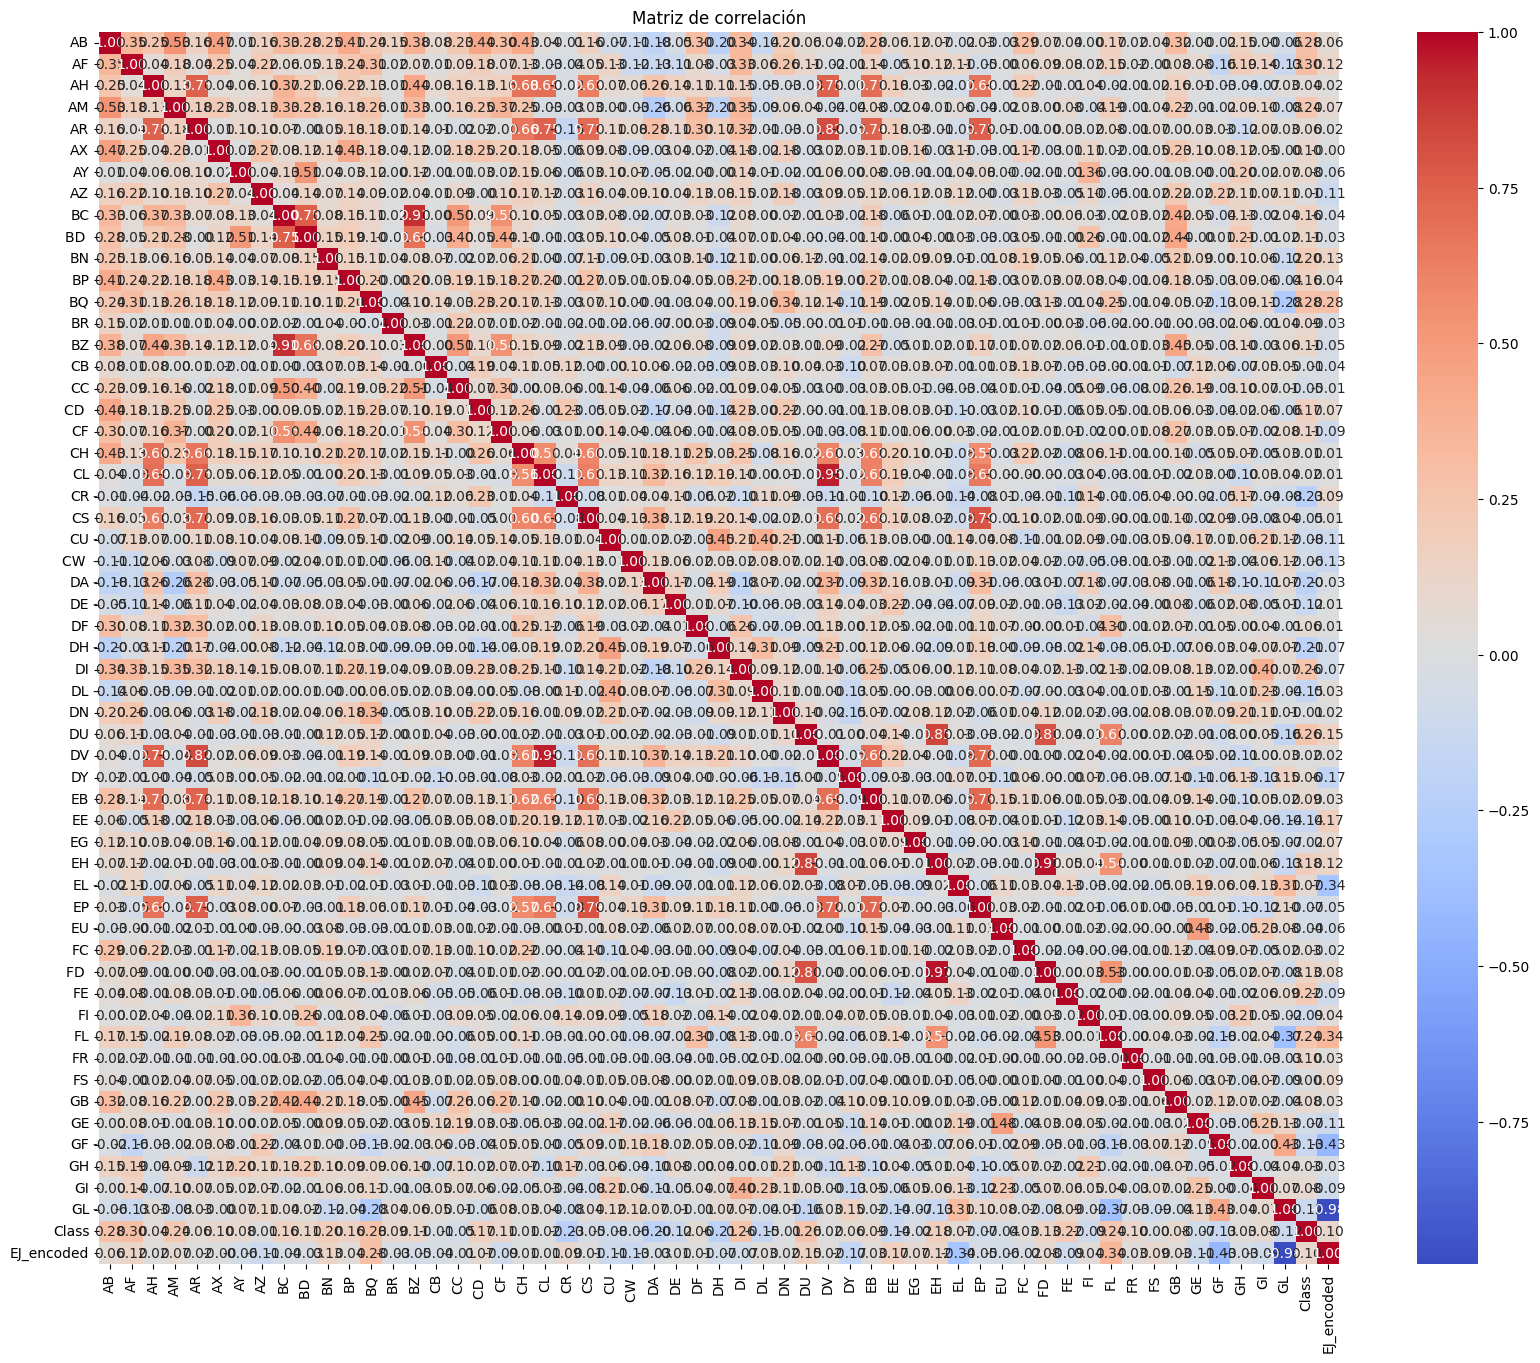

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

Revisamos las posibles correlaciones de las variables con nulos con otras variables

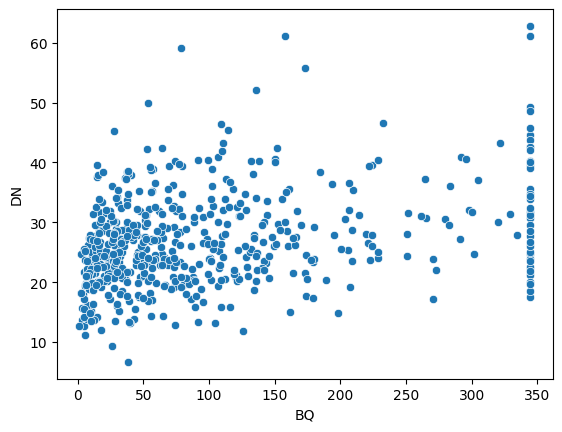

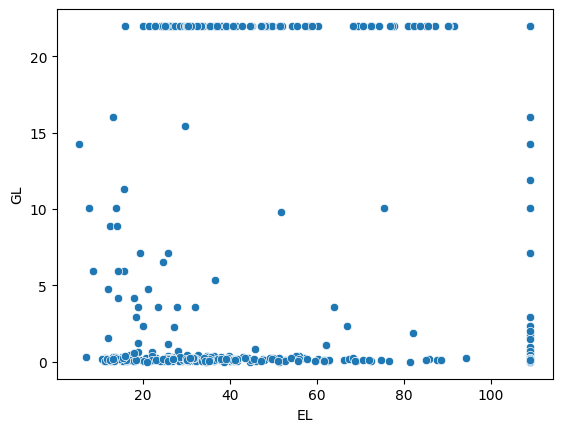

In [ ]:
# Scatter plot de 'BQ' con otra variable
sns.scatterplot(x='BQ', y='DN', data=df)
plt.show()

# Scatter plot de 'EL' con otra variable
sns.scatterplot(x='EL', y='GL', data=df)
plt.show()

In [ ]:
correlation = df['BQ'].corr(df['DN'])
print("Correlación entre BQ y DV:", correlation)

Correlación entre BQ y DV: 0.3441367147066123


In [ ]:
from scipy import stats

# Prueba t de Student para variables numéricas
group_nan = df[df['GL'].isna()]['Class']
group_no_nan = df[~df['GL'].isna()]['Class']

t_stat, p_value = stats.ttest_ind(group_nan, group_no_nan)
print("Valor p de la prueba t:", p_value)

Valor p de la prueba t: 0.6454377363871838


In [ ]:
from scipy import stats

# Prueba t de Student para variables numéricas
group_nan = df[df['BQ'].isna()]['Class']
group_no_nan = df[~df['BQ'].isna()]['Class']

t_stat, p_value = stats.ttest_ind(group_nan, group_no_nan)
print("Valor p de la prueba t:", p_value)

Valor p de la prueba t: 0.00016366506573964844


Debido a que no afectaban mucho a la variable objetivo, se eliminan las columnas

In [ ]:
df_train.drop(['BQ', 'EL'], axis=1)

Id        AB          AF          AH          AM         AR  \
616  ffcca4ded3bb  0.482849  2672.53426  546.663930  112.006102   8.138688   
292  7416fea10b6b  1.196440  4231.60958   85.200147   54.110784   8.138688   
483  c38cbd7f61dd  0.495668  3268.01398   85.200147   14.196648   8.138688   
600  f8eb43047d69  0.260653  3594.87128   85.200147   14.605452   8.138688   
442  af1a304f3c89  0.260653  4121.22370  176.209197   17.315327   8.138688   
..            ...       ...         ...         ...         ...        ...   
325  80841417ca53  0.542671  4857.60308  129.433158   21.849335  14.727774   
358  8ba2487388f2  0.568309  3703.32116  123.807144   13.747583   8.138688   
471  bbb1066a9afd  0.264926  1390.03590   85.200147   11.601362  10.217934   
262  67d932a88814  0.690090  3753.04248   85.200147   33.820788   8.138688   
253  65c5772a4afa  0.307656  4054.55754  129.145761   56.408758   8.138688   

           AX        AY         AZ        BC  ...       FR        FS  \
616  3.198099  0.116928   3.396778  7.948668  ...  1.14492  0.149006   
292  5.439426  0.025578   3.396778  7.150990  ...  2.28317  0.589251   
483  4.066281  0.035322   7.864896  1.229900  ...  1.06865  0.325104   
600  4.500372  0.025578  11.633492  1.229900  ...  1.17914  0.067730   
442  6.520224  0.025578  14.626942  1.229900  ...  0.49706  0.067730   
..        ...       ...        ...       ...  ...      ...       ...   
325  6.644250  0.147378   8.671552  1.229900  ...  1.08286  0.663754   
358  7.078341  0.101703  10.417206  4.441696  ...  1.72260  0.318331   
471  5.660901  0.074907   3.396778  3.113404  ...  1.13593  0.067730   
262  5.412849  0.025578   9.692476  1.229900  ...  1.90936  1.571336   
253  4.934463  0.025578   6.642308  1.229900  ...  1.05328  0.494429   

            GB          GE            GF         GH          GI         GL  \
616  13.673940   72.611063   6850.484442  45.745974  114.842372  21.978000   
292  31.217512  104.172736   7752.855951  22.136229   49.567584   0.071758   
483   8.827598   72.611063   1200.302145  25.745599    8.701076   0.112280   
600  15.766890  276.539536   3318.761565  12.576980   85.524144   0.124255   
442  25.664218  314.954185  54130.292660  43.412907   19.058520  21.978000   
..         ...         ...           ...        ...         ...        ...   
325  27.617638   72.611063   1896.371757  37.433260   59.163716   0.095221   
358  39.533500   72.611063    829.174806  49.712560   35.581048   0.109191   
471  22.966638   72.611063   4646.471769  23.356717   46.537768   0.062450   
262  14.534375  208.349890    903.021048  15.417964   21.069824   0.309793   
253  19.041194   72.611063   3494.694780  36.417427   28.006508   0.154286   

     Class  EJ_encoded  
616      0           0  
292      0           1  
483      0           1  
600      0           1  
442      0           0  
..     ...         ...  
325      0           1  
358      0           1  
471      1           1  
262      1           1  
253      0           1  

[493 rows x 57 columns]

In [ ]:
print(df_train.shape)

(493, 59)


In [ ]:
df_train = df_train.fillna(df_train.median())

<ipython-input-20-130e3b84d68f>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train = df_train.fillna(df_train.median())


In [ ]:
for column in df_train.columns:
    num_nulls = df_train[column].isna().sum()
    print(f'Column "{column}" has {num_nulls} nulls')

Column "Id" has 0 nulls
Column "AB" has 0 nulls
Column "AF" has 0 nulls
Column "AH" has 0 nulls
Column "AM" has 0 nulls
Column "AR" has 0 nulls
Column "AX" has 0 nulls
Column "AY" has 0 nulls
Column "AZ" has 0 nulls
Column "BC" has 0 nulls
Column "BD " has 0 nulls
Column "BN" has 0 nulls
Column "BP" has 0 nulls
Column "BQ" has 0 nulls
Column "BR" has 0 nulls
Column "BZ" has 0 nulls
Column "CB" has 0 nulls
Column "CC" has 0 nulls
Column "CD " has 0 nulls
Column "CF" has 0 nulls
Column "CH" has 0 nulls
Column "CL" has 0 nulls
Column "CR" has 0 nulls
Column "CS" has 0 nulls
Column "CU" has 0 nulls
Column "CW " has 0 nulls
Column "DA" has 0 nulls
Column "DE" has 0 nulls
Column "DF" has 0 nulls
Column "DH" has 0 nulls
Column "DI" has 0 nulls
Column "DL" has 0 nulls
Column "DN" has 0 nulls
Column "DU" has 0 nulls
Column "DV" has 0 nulls
Column "DY" has 0 nulls
Column "EB" has 0 nulls
Column "EE" has 0 nulls
Column "EG" has 0 nulls
Column "EH" has 0 nulls
Column "EJ" has 0 nulls
Column "EL" h

<ipython-input-24-e77332f66ded>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


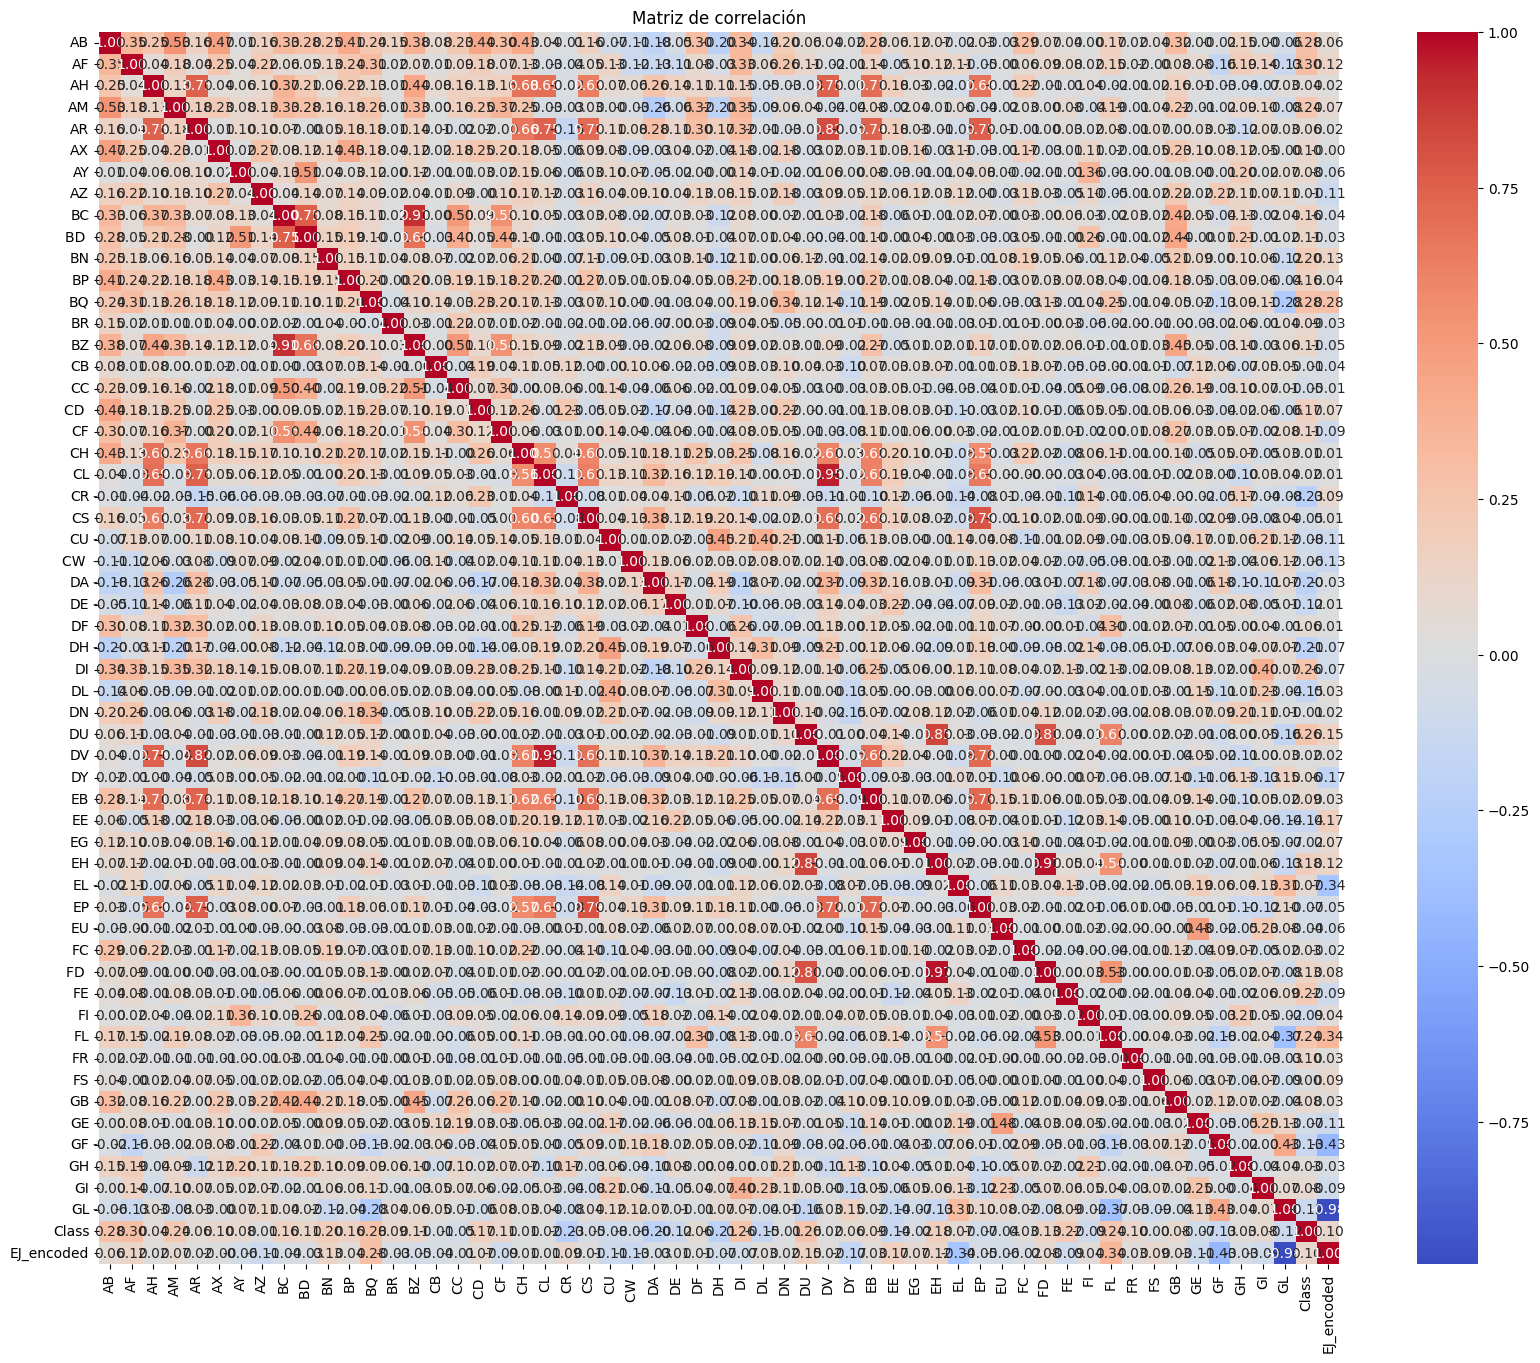

In [ ]:

correlation_matrix = df.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

### 2.3) Valores duplicados

In [ ]:
df_train[df_train.duplicated(keep=False)]

Empty DataFrame
Columns: [Id, AB, AF, AH, AM, AR, AX, AY, AZ, BC, BD , BN, BP, BQ, BR, BZ, CB, CC, CD , CF, CH, CL, CR, CS, CU, CW , DA, DE, DF, DH, DI, DL, DN, DU, DV, DY, EB, EE, EG, EH, EJ, EL, EP, EU, FC, FD , FE, FI, FL, FR, FS, GB, GE, GF, GH, GI, GL, Class, EJ_encoded]
Index: []

[0 rows x 59 columns]

## 3) Visualización

### 3.1) Análisis univariante

In [ ]:
plot_df = df_train.Class.value_counts()
plot_df.plot(kind="pie")

Importante: en el gráfico circular podemos ver que el conjunto de datos está muy desequilibrado ya que la fracción de muestras positivas (1) es muy pequeña en comparación con las muestras negativas (0).

Revisamos la correlacion de todas las variables con la variable objetivo con el fin de eliminar unas cuantas del conjunto de datos

In [ ]:
numeric_colunms=df_train.select_dtypes(include=['float64','int64'])

correlation_dict={}



for column in numeric_colunms.columns:
  correlation = df['Class'].corr(df[column])
  correlation_dict[column]=correlation

correlation_df=pd.DataFrame.from_dict(correlation_dict, orient='index', columns=['Correlation_with_Class'])

correlation_df=correlation_df.sort_values(by='Correlation_with_Class', ascending=False)
print(correlation_df)


            Correlation_with_Class
Class                     1.000000
AF                        0.302638
BQ                        0.281257
AB                        0.280612
DU                        0.261000
DI                        0.260760
FL                        0.244185
AM                        0.239170
FE                        0.216359
BN                        0.198283
EH                        0.179855
CD                        0.171304
BP                        0.157286
BC                        0.155882
FD                        0.131100
BZ                        0.112423
BD                        0.112184
CF                        0.109748
FR                        0.104099
AX                        0.097616
EJ_encoded                0.096500
BR                        0.088554
EB                        0.088005
GB                        0.083343
AY                        0.082420
GI                        0.076894
EL                        0.067947
AR                  

Como el valor de correlación de las columnas CH, FS Y DN y la variable objetivo Class es muy crecana a 0, generalmente indica una correlación debil, es decir, menos importante es la relación entre esas dos variables en terminos de su asociación lineal. Pero en el caso de la variable CH en la matriz de calor de correlación observamos que tiene valores altos con otras variables, entonces la dejamos. Para las otras dos procedemos a eliminarlas.

In [ ]:

columns_to_drop = ['FS', 'DN']

# Imprimir las columnas antes de la eliminación
print("Columnas antes de la eliminación:")
print(df_train.columns)

# Eliminar las columnas del DataFrame
df_train.drop(columns=columns_to_drop, inplace=True)

# Imprimir las columnas después de la eliminación
print("Columnas después de la eliminación:")
print(df_train.columns)

Columnas antes de la eliminación:
Index(['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class',
       'EJ_encoded'],
      dtype='object')
Columnas después de la eliminación:
Index(['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DU', 'DV', 'DY', 'EB',
       'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI', 'FL',
       'FR', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class', 'EJ_encoded'],
      dtype='object')


<Axes: xlabel='AB', ylabel='Count'>

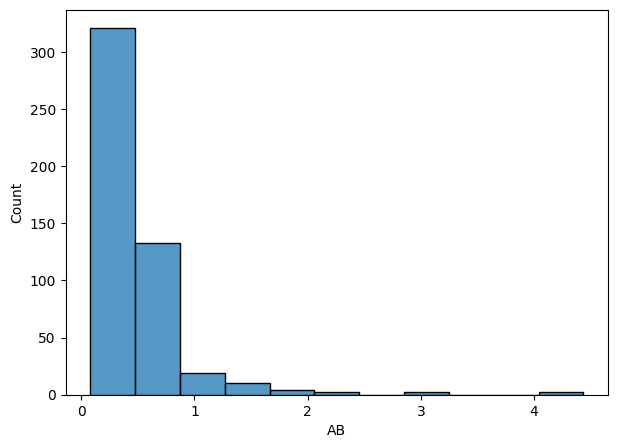

In [ ]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df_train, x='AB', bins=11)

In [ ]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df_train, x='AF', bins=11)

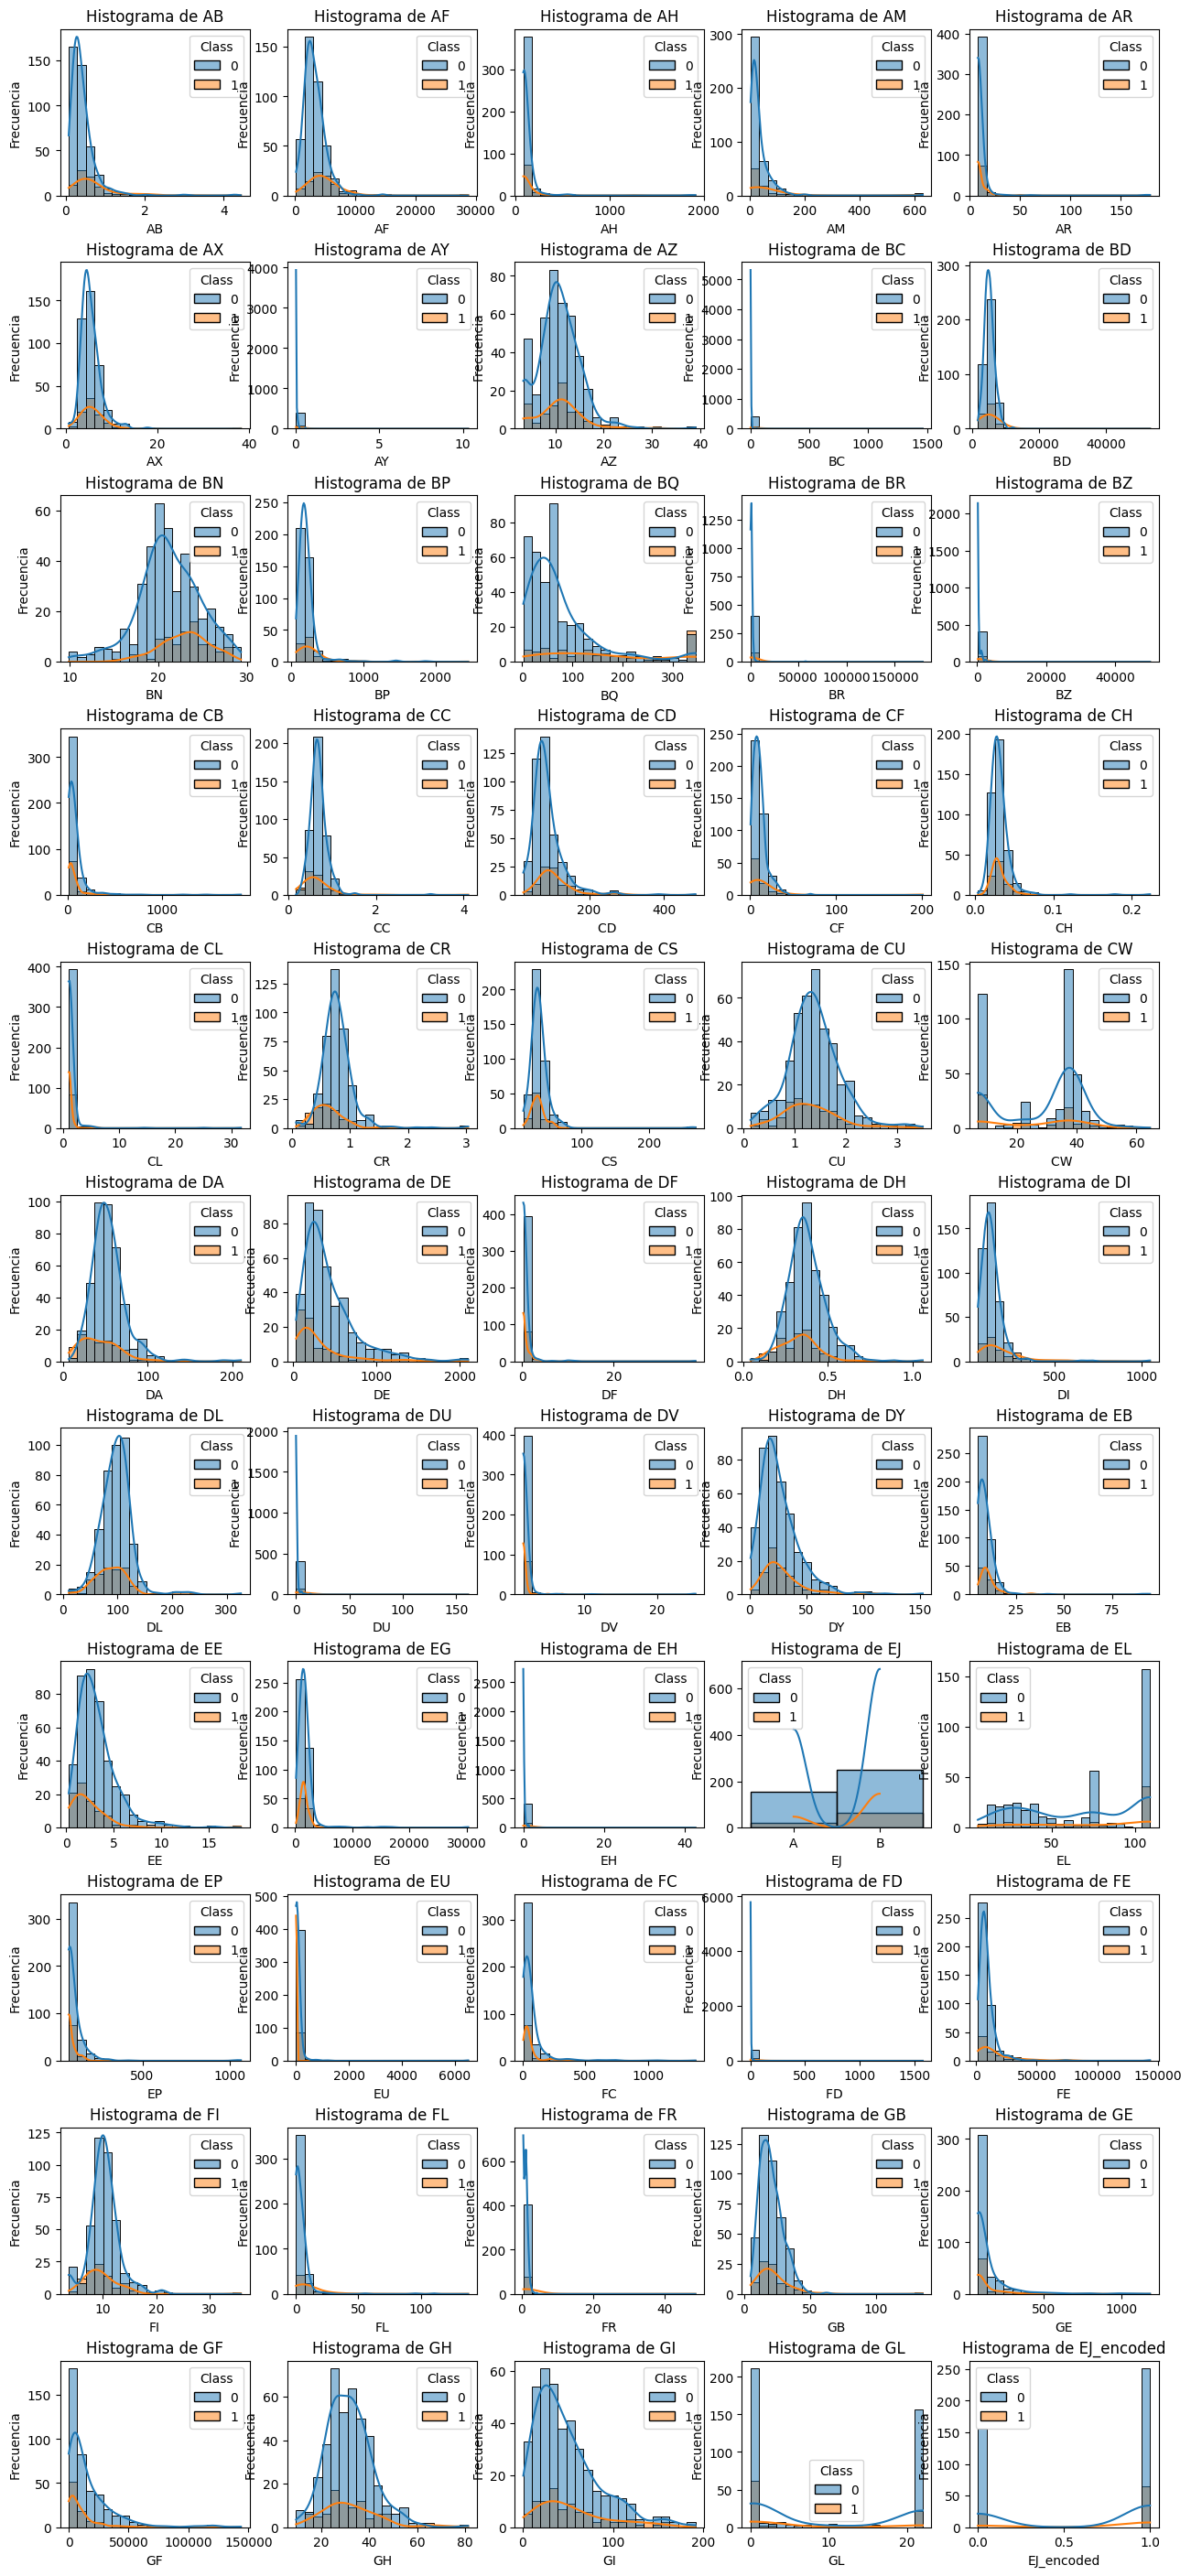

In [ ]:
fig, axs = plt.subplots(11,5, figsize=(15, 35))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, wspace=0.2, hspace=0.4)

vars = np.array(df_train.drop(columns=['Id', 'Class']).columns).reshape((11,5)).tolist()
for row in vars:
  for column in row:
    sns.histplot(data=df_train, x=column, hue='Class', bins=20, kde=True,legend=True,ax=axs[vars.index(row), row.index(column)])
    axs[vars.index(row), row.index(column)].set_title('Histograma de '+column)
    axs[vars.index(row), row.index(column)].set_xlabel(column)
    axs[vars.index(row), row.index(column)].set_ylabel('Frecuencia')
plt.show()

### Análisis

En todos los graficos observamos que las distribuciones de las dos clases se superponen, lo cual indica que cada variable no es muy discriminativa entre las dos clases.

Para als variables AB, AF, AH , AM, AR, AM, AY, BC, BD, BP, BRBZ, CB, CD, CF, CH. CL. CS, DF, DI, DU, DV, EB, EG, EH, EP, EU, FC, FD, FE, FL, FR, GE estan sumamente sesgados hacia la izquierda, pero tienen valores atipicos que se alejan de esta moda. Estos valores pueden contener información util que ayude a distinguir entre clases, o pueden ser anomalias que dificulten la clasificación precisa. Hay que buscar una manera de tratarlos.

Para AZ, BQ, CA, DA, DE, DY, EE, FI, GB si bien tienen tendencia a un sesgo negativo, sus valores son mas variados, y su distribución es en caida, ademas no se notan muchos valores atipicos.

### 3.2) Valores Atípicos

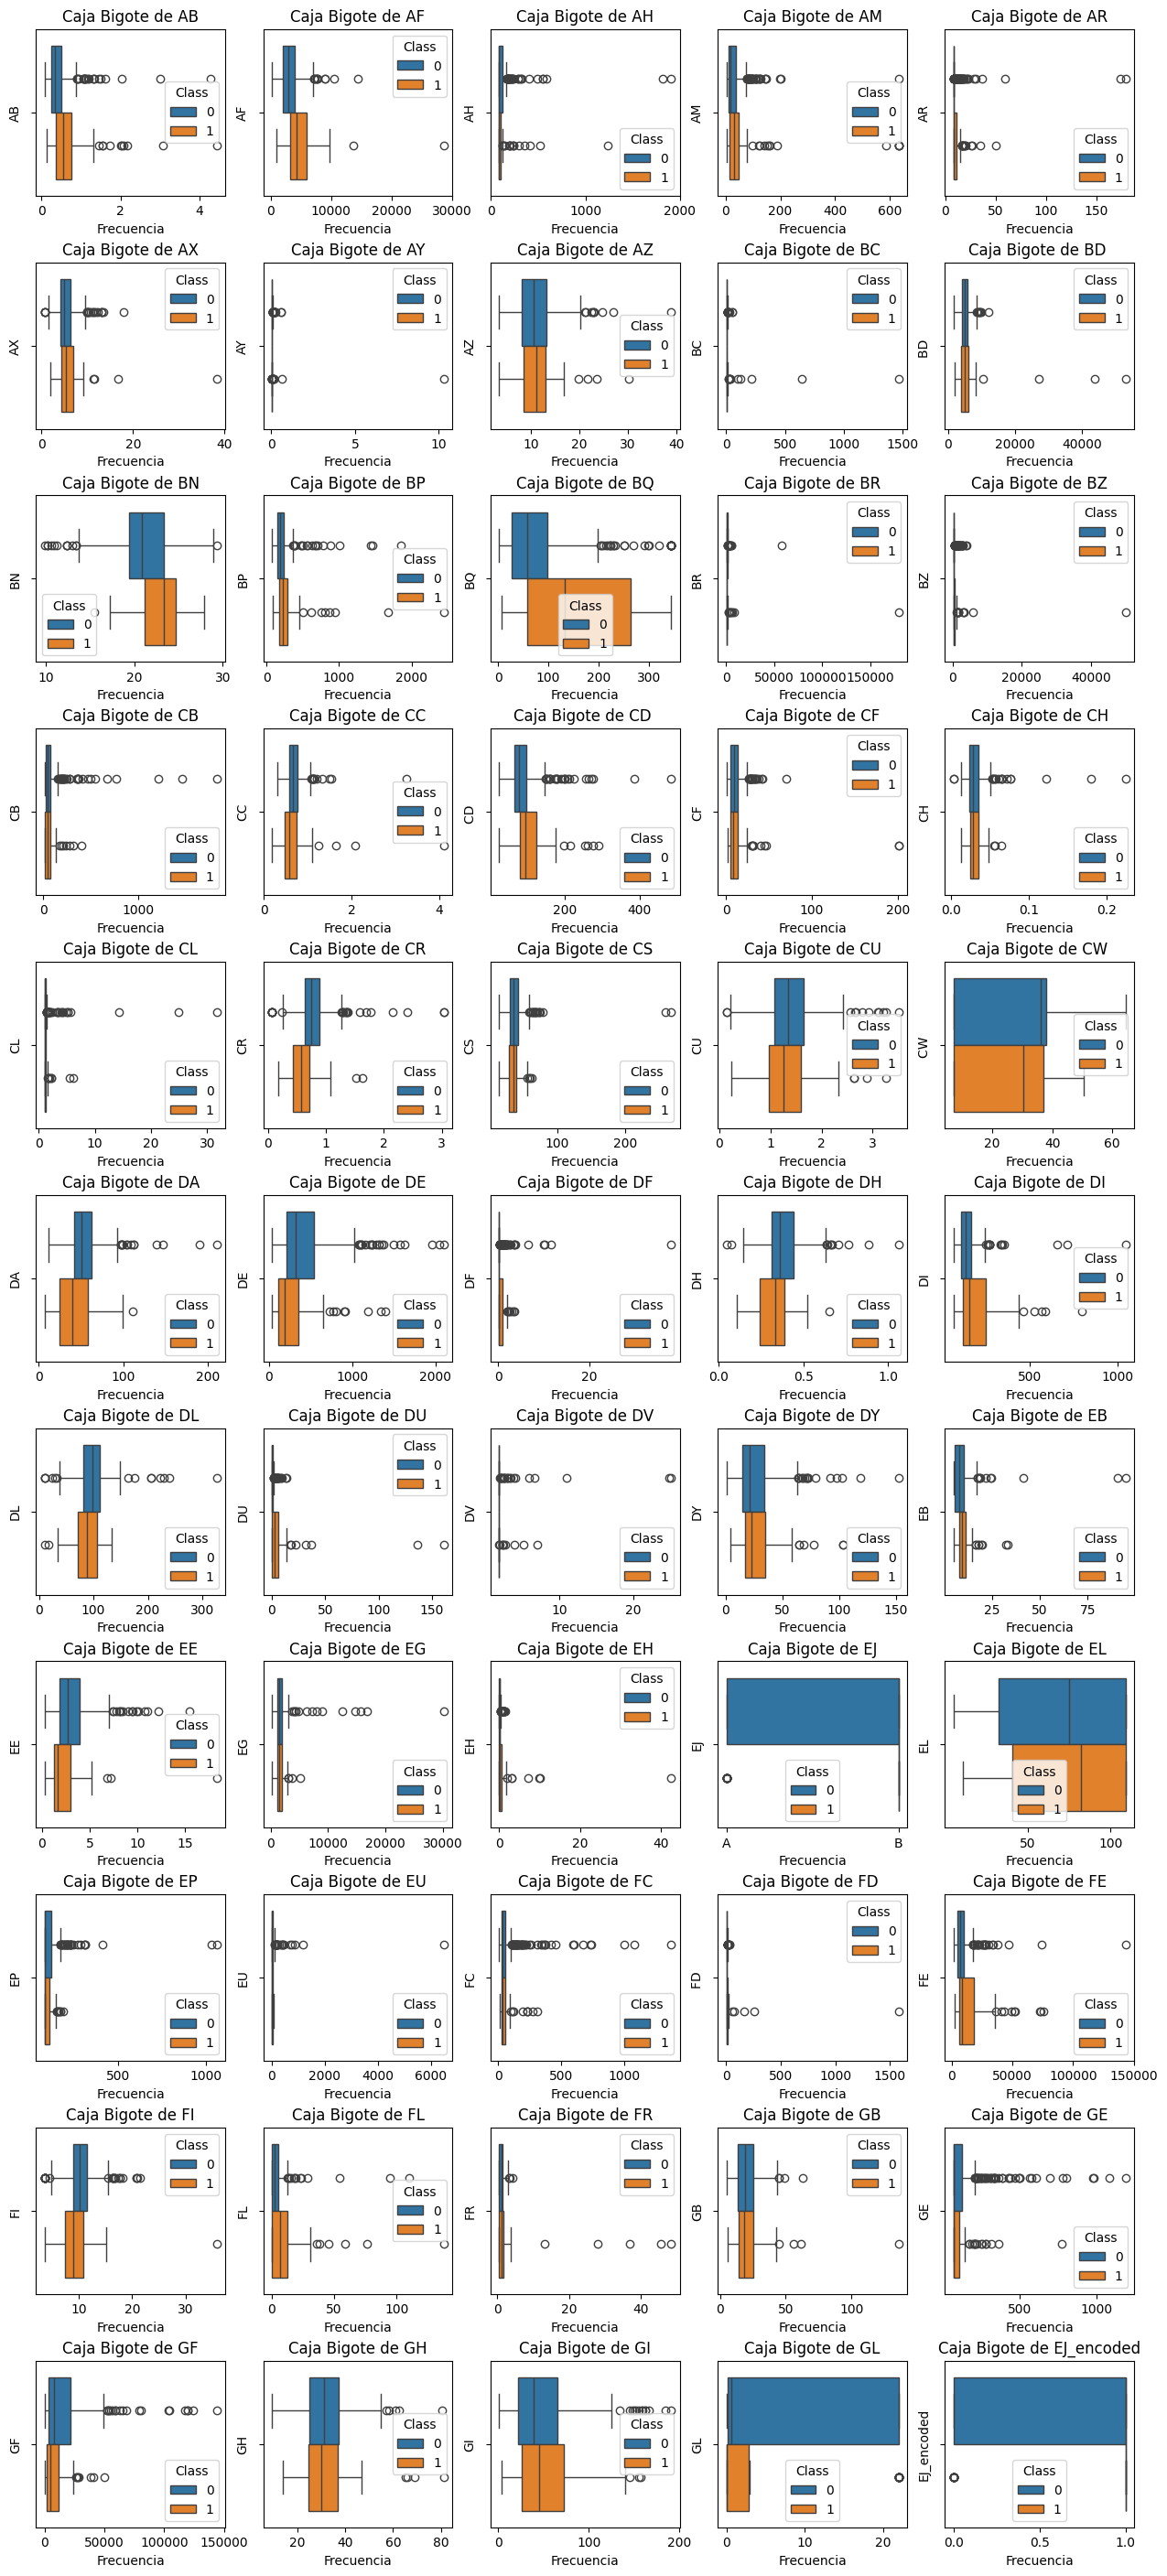

In [ ]:
fig, axs = plt.subplots(11,5, figsize=(15, 35))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, wspace=0.2, hspace=0.4)

vars = np.array(df_train.drop(columns=['Id', 'Class']).columns).reshape((11,5)).tolist()
for row in vars:
  for column in row:
    sns.boxplot(data=df_train, x=column, hue='Class',legend=True,ax=axs[vars.index(row), row.index(column)])
    axs[vars.index(row), row.index(column)].set_title('Caja Bigote de '+column)
    axs[vars.index(row), row.index(column)].set_xlabel('Frecuencia')
    axs[vars.index(row), row.index(column)].set_ylabel(column)
plt.show()

Vislumbramos que hay varios valores atipicos en todas las columnas. Se buscar encontrar una solución a esta o borrarlos si no afectan al modelo.

<ipython-input-31-a659bd420594>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


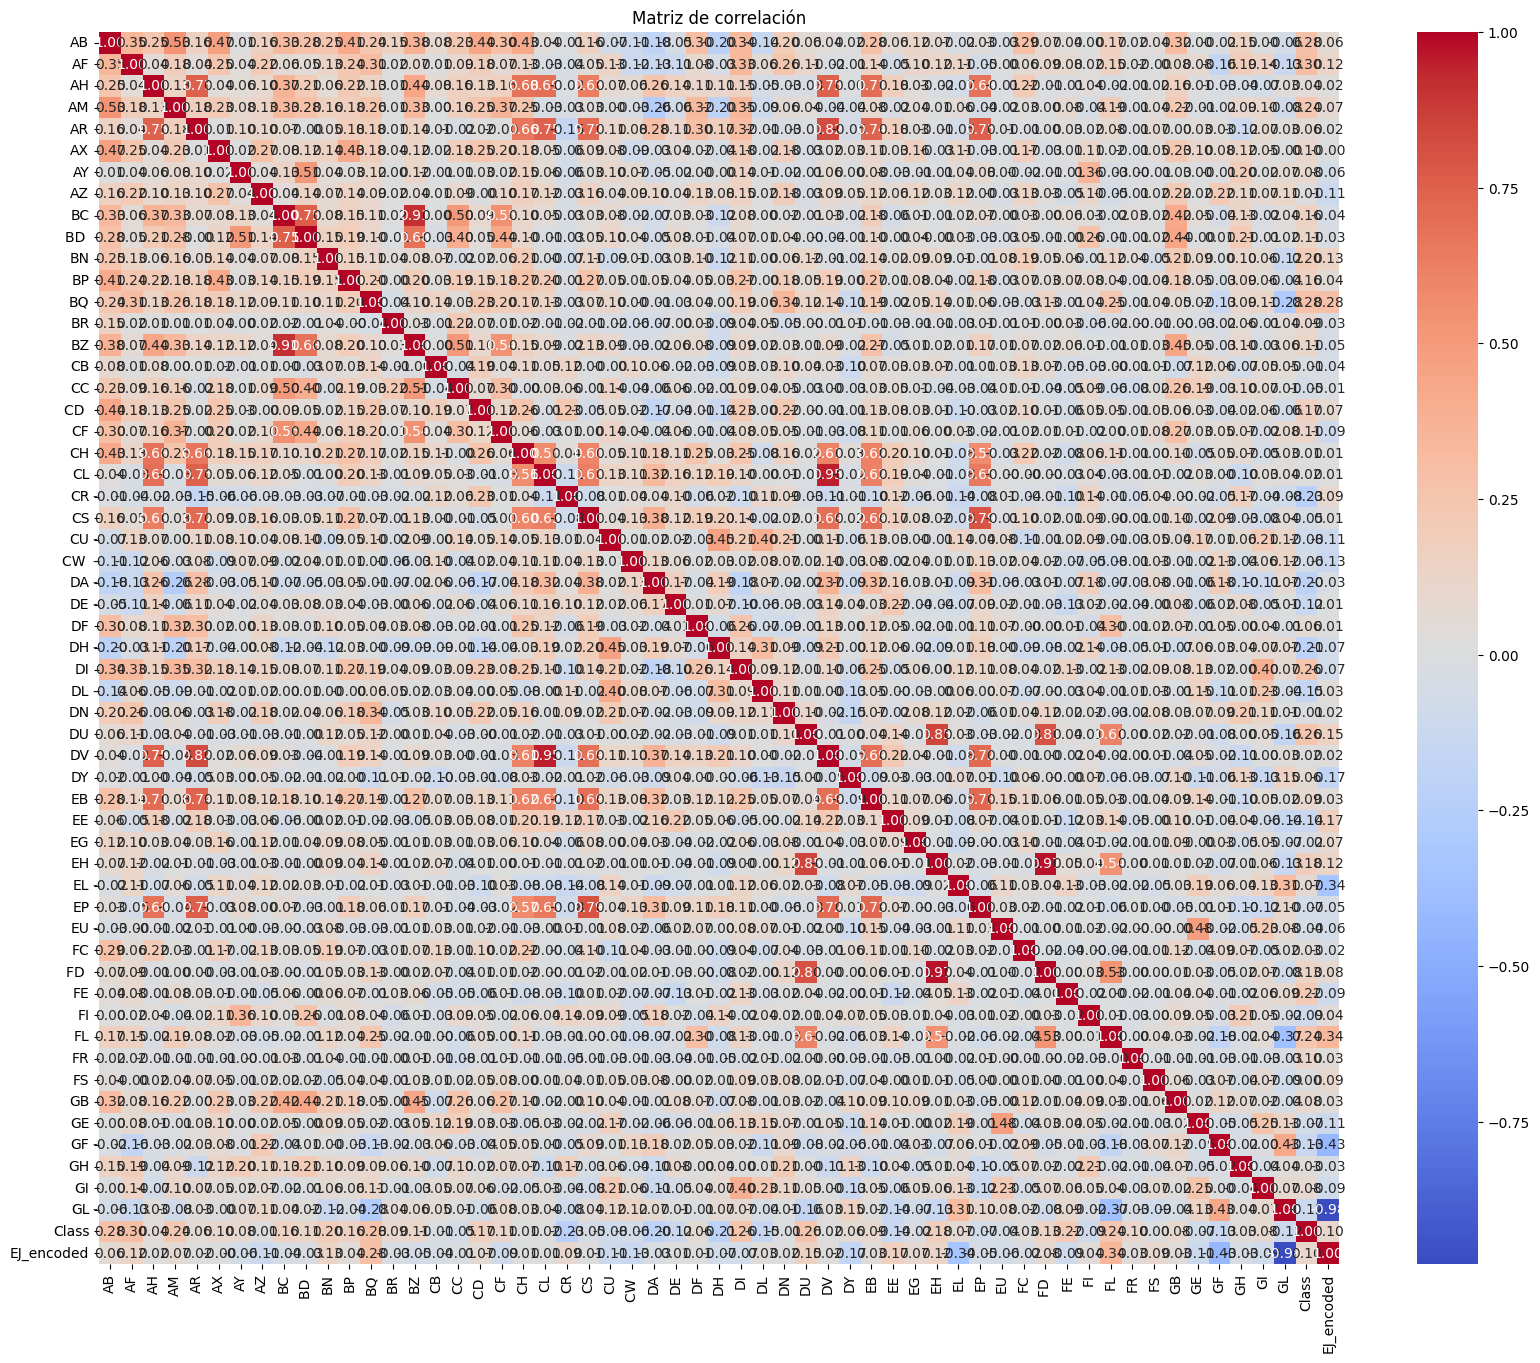

In [ ]:

correlation_matrix = df.corr()


plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

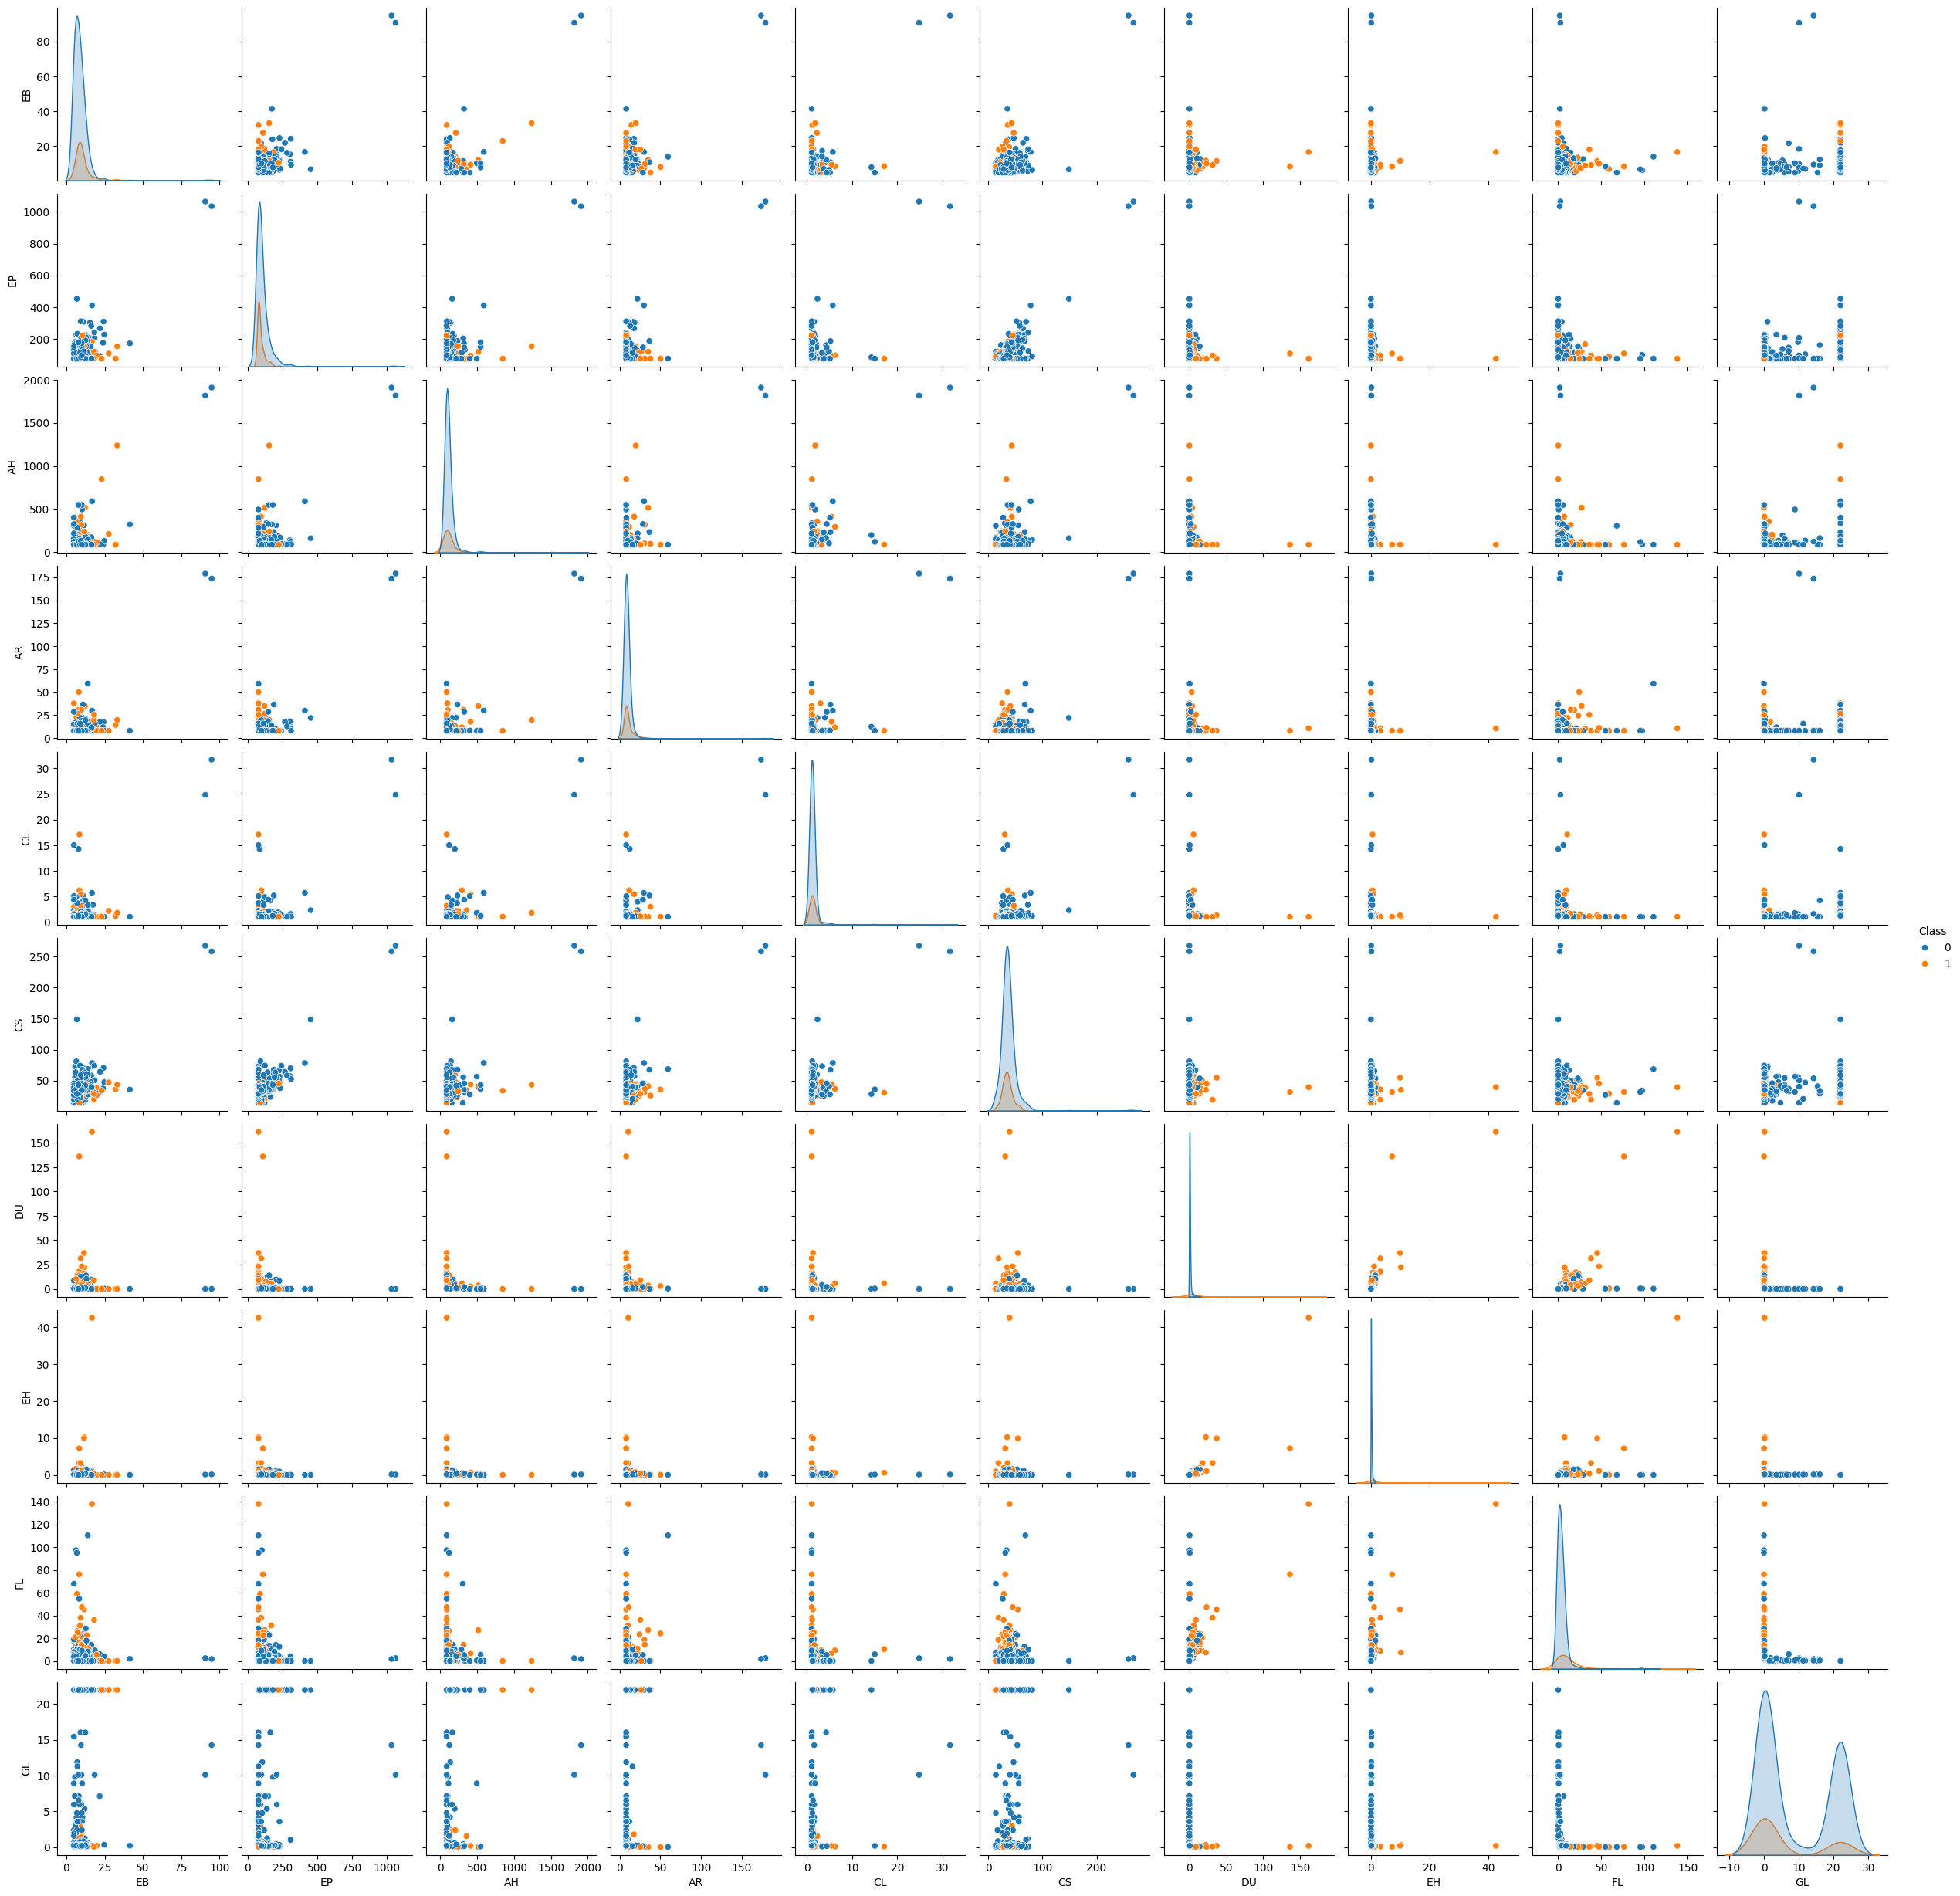

In [ ]:

variables_to_include = ['EB', 'EP', 'AH', 'AR', 'CL', 'CS', 'DU', 'EH', 'FL', 'GL']


sns.pairplot(df[variables_to_include + ['Class']], hue='Class')
plt.show()

#### Analisis

Podemos ver claramente en los graficos de GL x DU y Gl x EH hay una frontera entre los datos que indica si la clase es 0 o 1, que es nuestro problema en cuestión. Igualme DU x Fl, que se nota que mediante avanza hacia la izquierda, Class 1 predomina. Estas variables se posicionan con muy importantes a la hora de realizar el entrenamiento en el futuro, ya que se ve una clara distinción o frontera.